In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy.stats as stats
import statsmodels.stats.multitest as multi
import math
import csv
import os
import sys
import time
import datetime
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Load expression data, skipping the row with headers
expression_data = pd.read_csv("/content/data.txt", sep="\t", skiprows=[1], index_col=0)

# Transpose the expression data so that patient IDs become row indices
expression_data = expression_data.T

# Clean the patient IDs to match the format in the expression_subtype data
expression_data.index = expression_data.index.str.split('-').str[:3].str.join('-')

# Fill missing values with zeros
expression_data = expression_data.fillna(0)

# Remove duplicate index values from expression_data
expression_data = expression_data[~expression_data.index.duplicated(keep='first')]

expression_subtype = pd.read_csv("/content/GBM-subtype.tsv", sep="\t", index_col=0)

# Remove duplicate index values from expression_subtype
expression_subtype = expression_subtype[~expression_subtype.index.duplicated(keep='first')]

# Filter the expression data to only include samples that are in the expression_subtype data
expression_data = expression_data.loc[expression_data.index.isin(expression_subtype.index)]

# Convert the expression_subtype data into a one-hot encoded matrix
one_hot = pd.get_dummies(expression_subtype['EXPRESSION_SUBTYPE'])

# Preprocess your expression data
expression_data_scaled = StandardScaler().fit_transform(expression_data)

# Perform hierarchical clustering
n_clusters = 5  # Adjust the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = clustering.fit_predict(expression_data_scaled)

# Create a new DataFrame to hold cluster labels
cluster_results = pd.DataFrame({'Cluster': cluster_labels}, index=expression_data.index)

# Merge the cluster results with expression_subtype
expression_subtype = pd.concat([expression_subtype, cluster_results], axis=1)

# Now you can analyze the clusters and perform further tasks
# For example, you can print the cluster assignments



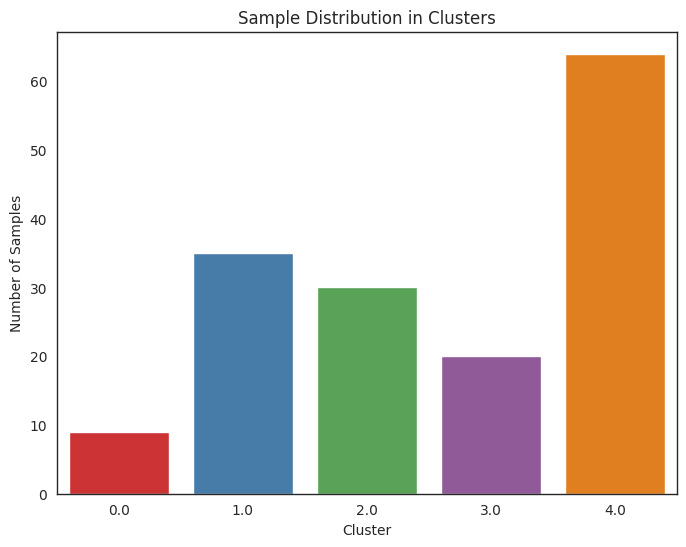

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Plot the distribution of samples in each cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=expression_subtype, palette='Set1')
plt.title('Sample Distribution in Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.show()











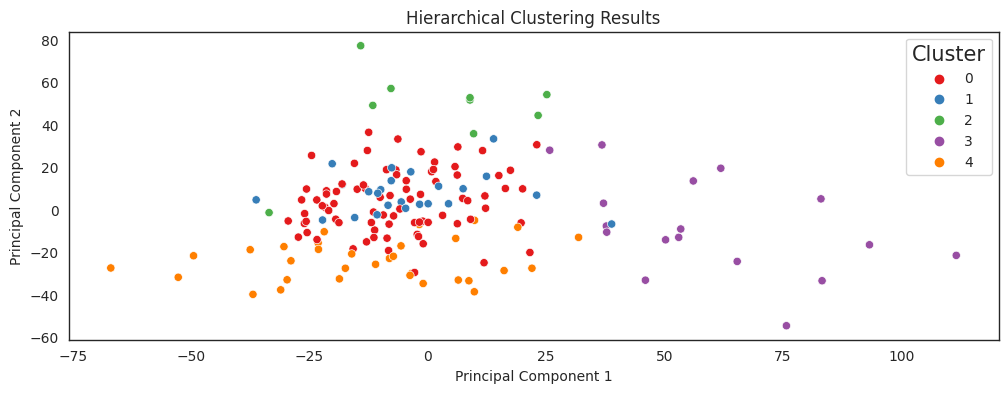

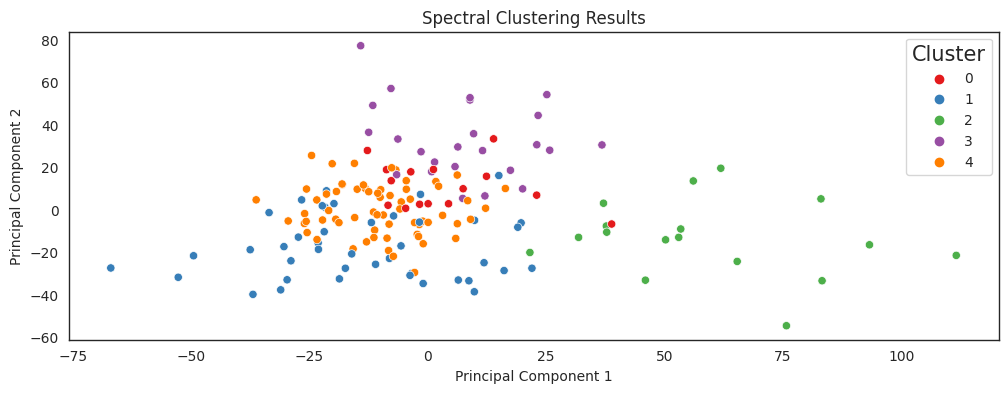

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA

# Load and preprocess expression data (similar to your previous code)
expression_data = pd.read_csv("/content/data.txt", sep="\t", skiprows=[1], index_col=0)
expression_data = expression_data.T
expression_data.index = expression_data.index.str.split('-').str[:3].str.join('-')
expression_data = expression_data.fillna(0)

# Load and preprocess expression subtype data (similar to your previous code)
expression_subtype = pd.read_csv("/content/GBM-subtype.tsv", sep="\t", index_col=0)
expression_subtype = expression_subtype[~expression_subtype.index.duplicated(keep='first')]
expression_data = expression_data.loc[expression_data.index.isin(expression_subtype.index)]

# Standardize the expression data
expression_data_scaled = StandardScaler().fit_transform(expression_data)

# Perform PCA for dimensionality reduction
n_components = 10  # Adjust the number of components
pca = PCA(n_components=n_components)
pca_results = pca.fit_transform(expression_data_scaled)

# Perform hierarchical clustering
n_clusters_hierarchical = 5  # Adjust the number of clusters
clustering_hierarchical = AgglomerativeClustering(n_clusters=n_clusters_hierarchical)
cluster_labels_hierarchical = clustering_hierarchical.fit_predict(pca_results)

# Perform spectral clustering
n_clusters_spectral = 5  # Adjust the number of clusters
clustering_spectral = SpectralClustering(n_clusters=n_clusters_spectral, affinity='nearest_neighbors')
cluster_labels_spectral = clustering_spectral.fit_predict(pca_results)

# Create a DataFrame to store clustering results
clustering_results = pd.DataFrame({
    'Sample': expression_data.index,
    'Hierarchical_Cluster': cluster_labels_hierarchical,
    'Spectral_Cluster': cluster_labels_spectral
})

# Merge the clustering results with expression_subtype
expression_subtype = pd.merge(expression_subtype, clustering_results, left_index=True, right_on='Sample')

# Plot hierarchical clustering results
n_components = 10  # Adjust the number of components
pca = PCA(n_components=n_components)
pca_results = pca.fit_transform(expression_data_scaled)

# Add PCA results to expression_subtype DataFrame
expression_subtype['PC1'] = pca_results[:, 0]
expression_subtype['PC2'] = pca_results[:, 1]

# Plot hierarchical clustering results
plt.figure(figsize=(12, 4))
sns.scatterplot(x='PC1', y='PC2', hue='Hierarchical_Cluster', data=expression_subtype, palette='Set1')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Plot spectral clustering results
plt.figure(figsize=(12, 4))
sns.scatterplot(x='PC1', y='PC2', hue='Spectral_Cluster', data=expression_subtype, palette='Set1')
plt.title('Spectral Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()









In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy.stats as stats
import statsmodels.stats.multitest as multi
import math
import csv
import os
import sys
import time
import datetime
import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import pandas as pd

# Load expression data, skipping the row with headers
expression_data = pd.read_csv("/content/data.txt", sep="\t", skiprows=[1], index_col=0)

# Transpose the expression data so that patient IDs become row indices
expression_data = expression_data.T

# Clean the patient IDs to match the format in the expression_subtype data
expression_data.index = expression_data.index.str.split('-').str[:3].str.join('-')

# Fill missing values with zeros
expression_data = expression_data.fillna(0)

# Remove duplicate index values from expression_data
expression_data = expression_data[~expression_data.index.duplicated(keep='first')]

# Downsample the data by taking every nth sample
downsample_factor = 10  # Change this to the desired downsample factor
downsampled_data = expression_data.iloc[::downsample_factor]

# Now you can proceed with the rest of your code using 'downsampled_data'


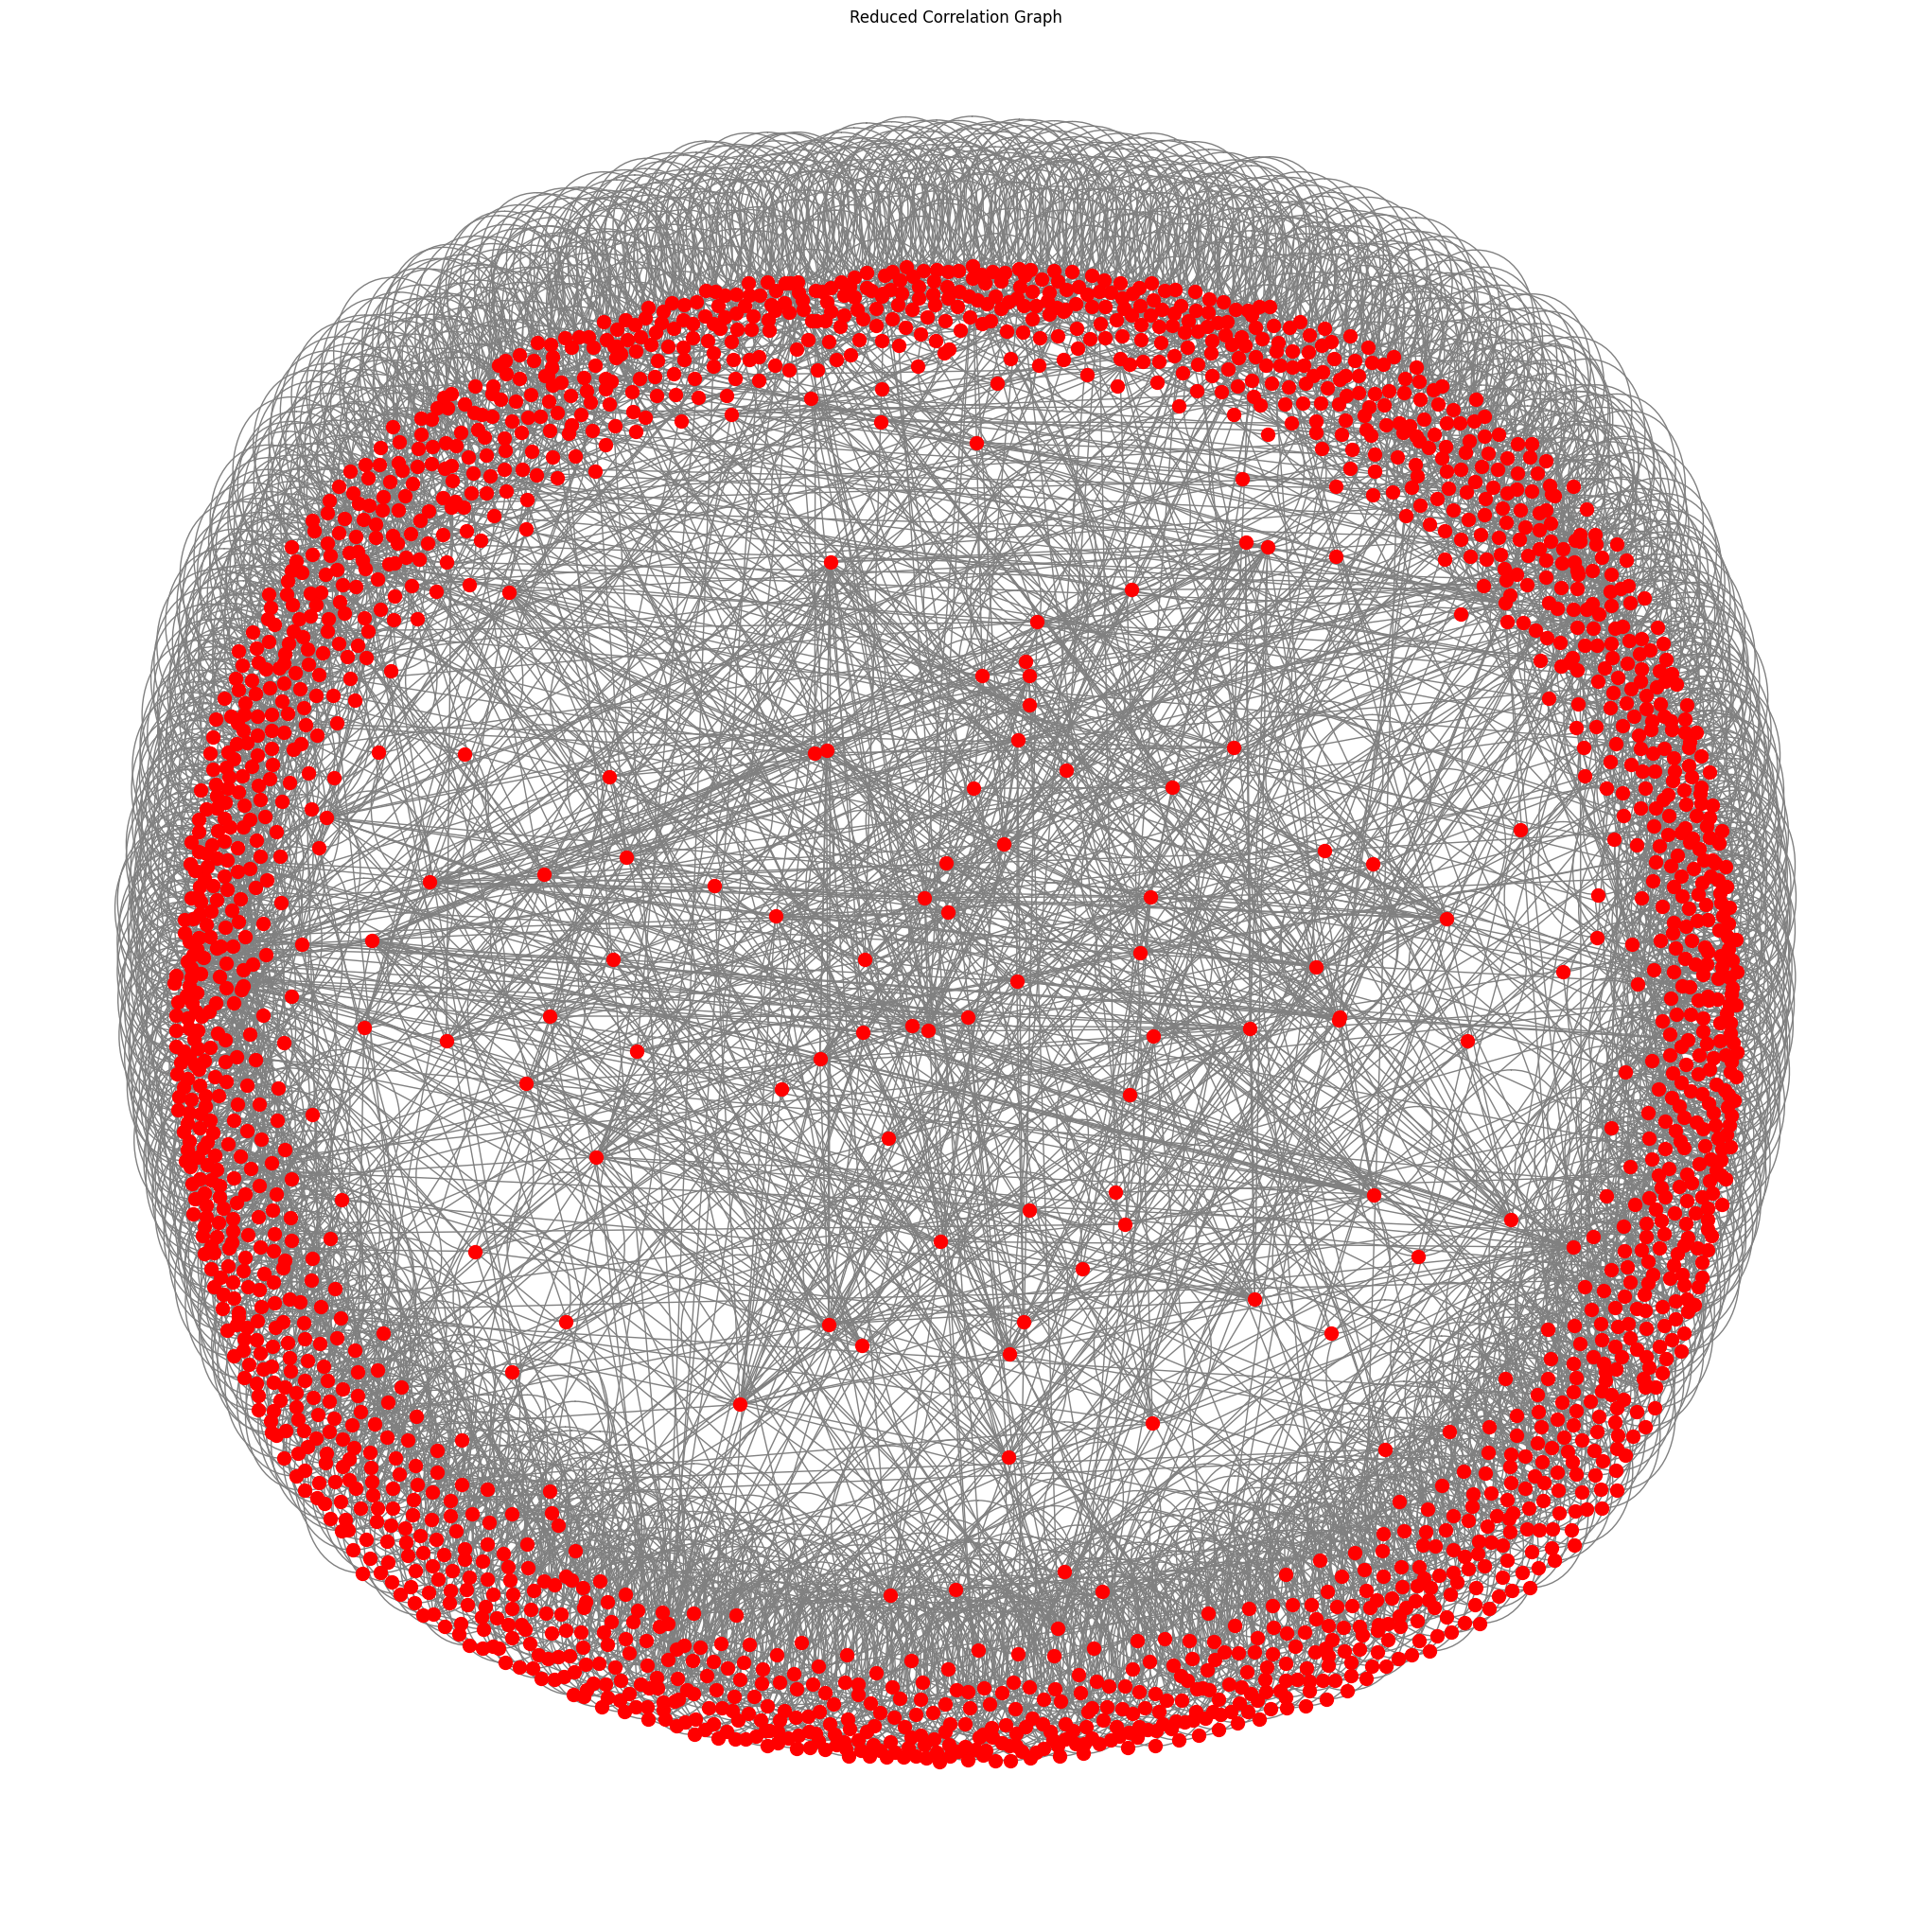

In [4]:
# correlation_matrix = downsampled_data.corr()

# # Set a threshold for correlation values to keep
# correlation_threshold = 0.9  # Change this to the desired threshold

# # Create a graph from the correlation matrix, keeping only edges above the threshold
# G = nx.Graph()
# for i, node1 in enumerate(correlation_matrix.index):
#     for j, node2 in enumerate(correlation_matrix.columns):
#         correlation_value = correlation_matrix.iloc[i, j]
#         if correlation_value > correlation_threshold:
#             G.add_edge(node1, node2, weight=correlation_value)

# Plot the reduced graph
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, seed=42,k=0.7)  # Layout algorithm (you can choose another layout)
nx.draw(G, pos, with_labels=False, node_size=100, node_color='red', edge_color='gray')
plt.title("Reduced Correlation Graph")
plt.show()




